In [1]:
%reset
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.ticker as mticker
import warnings; warnings.filterwarnings('ignore')
import cmocean
from gsw import alpha, SA_from_SP, p_from_z, CT_from_pt, beta, sigma1 

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
%cd /archive/Raphael.Dussin/xanadu_esm4_20190304_mom6_2019.12.16/OM4p125_JRA55do1.4_mle3d_cycle3/gfdl.ncrc4-intel16-prod/pp/ocean_annual_z_d2/

fs=xr.open_dataset('ocean_annual_z_d2.static.nc')
lon=fs['geolon']; lat=fs['geolat']
lonu=fs['geolon_u']; latu=fs['geolat_u']
lonv=fs['geolon_v']; latv=fs['geolat_v']
deptho=fs['deptho'][:,:]
print(fs)

%cd av/annual_5yr/


/arch2/rnd/xanadu_esm4_20190304_mom6_2019.12.16/OM4p125_JRA55do1.4_mle3d_cycle3/gfdl.ncrc4-intel16-prod/pp/ocean_annual_z_d2
<xarray.Dataset>
Dimensions:       (xh: 2880, xq: 2880, yh: 2240, yq: 2240)
Coordinates:
  * xh            (xh) float64 -298.6 -298.5 -298.4 -298.3 ... 61.05 61.16 61.28
  * xq            (xq) float64 -298.5 -298.4 -298.3 -298.2 ... 61.12 61.23 61.35
  * yh            (yh) float64 -83.62 -83.58 -83.54 -83.5 ... 89.86 89.92 89.97
  * yq            (yq) float64 -83.6 -83.56 -83.52 -83.48 ... 89.89 89.95 90.0
Data variables:
    Coriolis      (yq, xq) float32 ...
    areacello     (yh, xh) float32 ...
    areacello_bu  (yq, xq) float32 ...
    areacello_cu  (yh, xq) float32 ...
    areacello_cv  (yq, xh) float32 ...
    deptho        (yh, xh) float32 ...
    dxCu          (yh, xq) float32 ...
    dxCv          (yq, xh) float32 ...
    dxt           (yh, xh) float32 ...
    dyCu          (yh, xq) float32 ...
    dyCv          (yq, xh) float32 ...
    dyt           (y

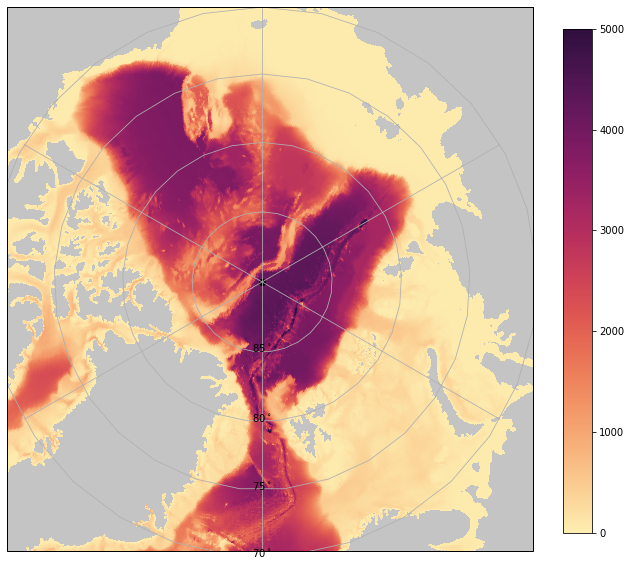

In [3]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_axes([.92, 0.15, 0.04, .7])
ax = plt.axes(projection=ccrs.Orthographic(0, 90))


ax.set_extent([-180, 180, 70, 90],ccrs.PlateCarree())
plt.pcolormesh(lon, lat,np.ones((2240,2880)),transform=ccrs.PlateCarree(),cmap='gray',vmin=0,vmax=1.3);
plt.pcolormesh(lon, lat,deptho,transform=ccrs.PlateCarree(),vmin=0,vmax=5000,cmap=cmocean.cm.matter);
plt.colorbar(cax=ax1)
gl=ax.gridlines(crs=ccrs.PlateCarree())
gl.ylocator = mticker.FixedLocator([70, 75, 80, 85, 90])

ax.scatter(180, 90, marker='o',c='black', transform=ccrs.PlateCarree())
pointx=[0,0,0,0]; pointy=[70,75,80,85]; text=['70$^\circ$','75$^\circ$','80$^\circ$','85$^\circ$']
for i in range(len(pointx)):
    ax.text(pointx[i],pointy[i],text[i],ha='center', transform=ccrs.PlateCarree())

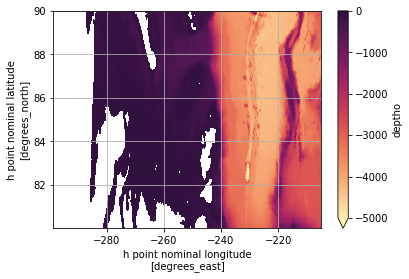

In [4]:

#IF YOU WANT TO USE XARRAY, CHANGE COORDINATES:
#lonin = xr.open_dataset('ocean_monthly_z.static.nc')['geolon']
#latin = xr.open_dataset('ocean_monthly_z.static.nc')['geolat']
#ds=ds.assign_coords(xnew=lonin)
#ds=ds.assign_coords(ynew=latin)
#proj=ccrs.NorthPolarStereo()
#ax = plt.axes(projection=proj);
#ds.deptho.plot.pcolormesh(ax=ax,transform=ccrs.PlateCarree(),x='xnew', y='ynew');
#ax.set_extent([-180, 180, 70, 90], ccrs.PlateCarree())

#Barents Sea:
# depth2d=-fs.deptho.sel(xh=slice(-14,66),yh=slice(70,90))  
# xh2d=fs.xh.sel(xh=slice(-14,66)) 
# yh2d=fs.yh.sel(yh=slice(70,90)) 
#Kara Sea:
depth2d=-fs.deptho.sel(xh=slice(-300,-205),yh=slice(80,90))  
xh2d=fs.xh.sel(xh=slice(-300,-205)) 
yh2d=fs.yh.sel(yh=slice(80,90)) 
#Laptev/East Siberian Sea
# depth2d=-fs.deptho.sel(xh=slice(-243,-186.5),yh=slice(70,90))   
# xh2d=fs.xh.sel(xh=slice(-243,-186.5)) 
# yh2d=fs.yh.sel(yh=slice(70,90)) 

depth2d.plot.pcolormesh(vmin=-5000,vmax=0,cmap=cmocean.cm.matter);
plt.grid()



In [5]:
salt = xr.open_dataset('ocean_annual_z_d2.2003-2007.ann.nc')['so']
theta= xr.open_dataset('ocean_annual_z_d2.2003-2007.ann.nc')['thetao']
agessc=(xr.open_dataset('ocean_annual_z_d2.2003-2007.ann.nc')['agessc'])
agessc=agessc/np.max(agessc)
zl = xr.open_dataset('ocean_annual_z_d2.2003-2007.ann.nc')['z_l']
xh = xr.open_dataset('ocean_annual_z_d2.2003-2007.ann.nc')['xh']
yh = xr.open_dataset('ocean_annual_z_d2.2003-2007.ann.nc')['yh']

#Barents Sea Slice:
# salt2d=salt.sel(yh=[86], method='nearest').sel(xh=slice(-14,66))
# theta2d=theta.sel(yh=[86], method='nearest').sel(xh=slice(-14,66))  
# agessc2d=agessc.sel(yh=[86], method='nearest').sel(xh=slice(-14,66)) 
# xh2d=xh.sel(xh=slice(-14,66))

#Kara Sea Slice:
salt2d=salt.sel(yh=[88], method='nearest').sel(xh=slice(-300,-205))  
theta2d=theta.sel(yh=[88], method='nearest').sel(xh=slice(-300,-205)) 
agessc2d=agessc.sel(yh=[88], method='nearest').sel(xh=slice(-300,-205)) 
xh2d=xh.sel(xh=slice(-300,-205))

#Laptev/East Siberian Sea Slice:  
# salt2d=salt.sel(xh=[-208], method='nearest').sel(yh=slice(70,90))  
# theta2d=theta.sel(xh=[-208], method='nearest').sel(yh=slice(70,90)) 
# agessc2d=agessc.sel(xh=[-208], method='nearest').sel(yh=slice(70,90))
# yh2d=yh.sel(yh=slice(70,90))

# fig = plt.figure(figsize=(10,5))
# theta2d.plot(vmin=-2,vmax=2,cmap='RdBu_r')
# ax = plt.gca(); ax.set_facecolor((0.5, 0.5, 0.5))
# plt.gca().invert_yaxis()
# plt.ylim((5000,0))
# # plt.ylim((4000,0))
# # plt.xlim((78,82))

# fig = plt.figure(figsize=(10,5))
# salt2d.plot(vmin=34.0,vmax=35,cmap=cmocean.cm.haline)
# ax = plt.gca(); ax.set_facecolor((0.5, 0.5, 0.5))
# plt.gca().invert_yaxis()
# plt.ylim((5000,0))
# # plt.ylim((4000,0))
# # plt.xlim((78,82))

# fig = plt.figure(figsize=(10,5))
# agessc2d.plot(vmin=0,vmax=1,cmap=cmocean.cm.matter)
# ax = plt.gca(); ax.set_facecolor((0.5, 0.5, 0.5))
# plt.gca().invert_yaxis()
# plt.ylim((5000,0))
# # plt.ylim((4000,0))
# # plt.xlim((78,82))


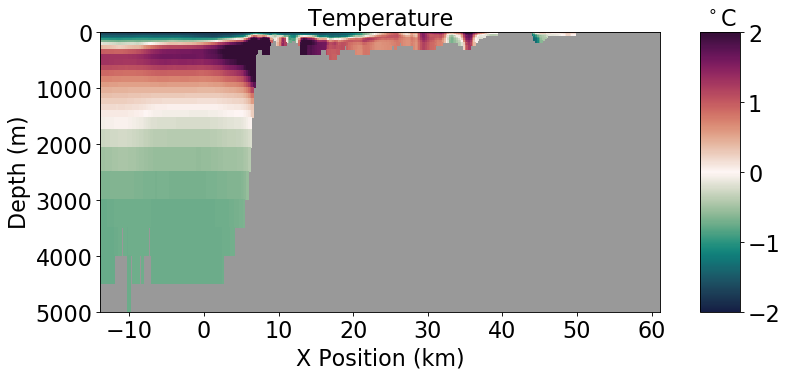

In [26]:
fig = plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.05,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([.8, 0.1, 0.05, 0.7])
ax1.set_facecolor((0.6, 0.6, 0.6))

ax1.set_title('Temperature',fontsize=20)
ax1.set_xlabel('X Position (km)',fontsize=20)
ax1.set_ylabel('Depth (m)',fontsize=20)
plt.title('$^\circ$C', fontsize=20)
ax1.set_ylim(0,5000)


plotted= ax1.pcolor(xh2d,zl,np.squeeze(theta2d),cmap=cmocean.cm.curl,vmin=-2.,vmax=2)   
cbar = plt.colorbar(cax=ax2, mappable=plotted, orientation = 'vertical')
cbar.ax.tick_params(labelsize=20);
ax1.tick_params(labelsize=20)
#ax1.set_xlim(ax1.get_xlim()[::-1])
ax1.set_ylim(ax1.get_ylim()[::-1])
plt.show()

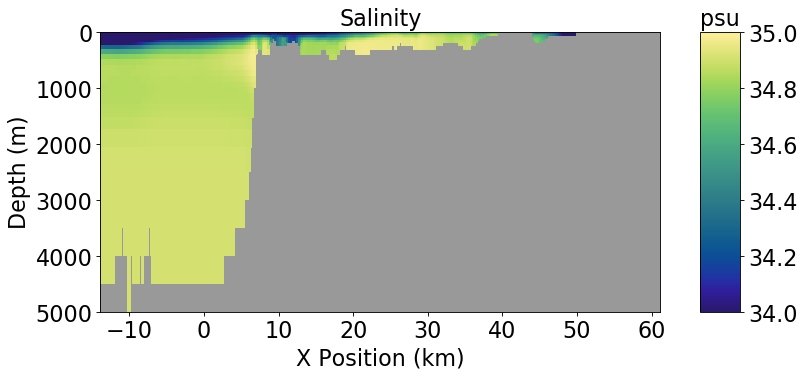

In [27]:
fig = plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.05,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([.8, 0.1, 0.05, 0.7])
ax1.set_facecolor((0.6, 0.6, 0.6))

ax1.set_title('Salinity',fontsize=20)
ax1.set_xlabel('X Position (km)',fontsize=20)
ax1.set_ylabel('Depth (m)',fontsize=20)
plt.title('psu', fontsize=20)
ax1.set_ylim(0,5000)


plotted= ax1.pcolor(xh2d,zl,np.squeeze(salt2d),cmap=cmocean.cm.haline,vmin=34.,vmax=35)   
cbar = plt.colorbar(cax=ax2, mappable=plotted, orientation = 'vertical')
cbar.ax.tick_params(labelsize=20);
ax1.tick_params(labelsize=20)
#ax1.set_xlim(ax1.get_xlim()[::-1])
ax1.set_ylim(ax1.get_ylim()[::-1])
plt.show()

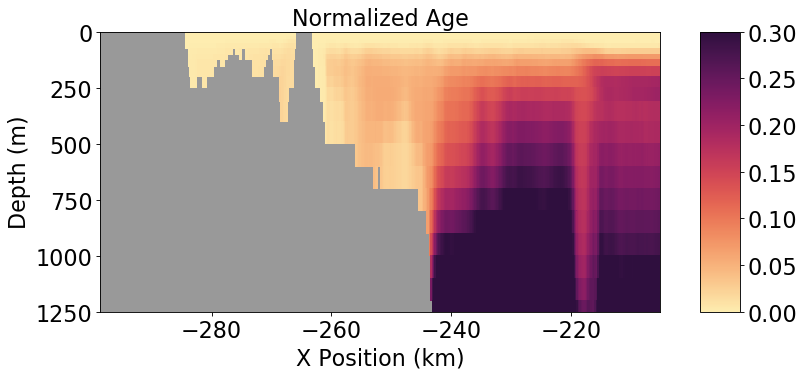

In [12]:
fig = plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.05,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([.8, 0.1, 0.05, 0.7])
ax1.set_facecolor((0.6, 0.6, 0.6))

ax1.set_title('Normalized Age',fontsize=20)
ax1.set_xlabel('X Position (km)',fontsize=20)
ax1.set_ylabel('Depth (m)',fontsize=20)
ax1.set_ylim(0,1250)
#ax1.set_xlim(0,2000)


plotted= ax1.pcolor(xh2d,zl,np.squeeze(agessc2d),cmap=cmocean.cm.matter,vmin=0.,vmax=.3)   
cbar = plt.colorbar(cax=ax2, mappable=plotted, orientation = 'vertical')
cbar.ax.tick_params(labelsize=20);
ax1.tick_params(labelsize=20)
#ax1.set_xlim(ax1.get_xlim()[::-1])
ax1.set_ylim(ax1.get_ylim()[::-1])
plt.show()

In [ ]:
# #PLOTTING THE SALINITY (alongshore mean or a slice):

# fig = plt.figure(figsize=(9, 7), dpi= 80, facecolor='w', edgecolor='k')
# ax1 = fig.add_axes([0.15,0.1,0.7,0.7]) 
# ax2 = fig.add_axes([.9, 0.1, 0.05, 0.7])
# ax1.set_facecolor((0.92, 0.92, 0.92))
# ax1.set_title('Ideal Age Tracer',fontsize=20)
# ax1.set_xlabel('X Position (km)',fontsize=16)
# ax1.set_ylabel('Depth (m)',fontsize=16)
# ax1.tick_params(labelsize=16); 
# ax2.set_title('Years',fontsize=16); ax2.tick_params(labelsize=14)

# salt_slice=file1.variables['salt'][479,:,0,:] #Using original Z* coordinates
# xq 

# plotted= ax1.pcolor(xq,zl,salt_slice,cmap='rainbow',vmin=34.5,vmax=35) #Plotting a slice
# cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical') 


# plt.show()